# Ttile : Heart Disease Prediction
### Author : Atiq Ur Rehman
### Date : 12-Jun-2024
#### Dataset : Heart Disease UCI

# Meta-Data
### About Dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
`id` (Unique id for each patient)\
`age` (Age of the patient in years)\
`origin` (place of study)\
`sex` (Male/Female)\
`cp` chest pain type 
* typical angina
* atypical angina
* non-angina
* asymptomatic\
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))\
`chol` (serum cholesterol in mg/dl)\
`fbs` (if fasting blood sugar > 120 mg/dl)\
`restecg` (resting electrocardiographic results)\
-- `Values`: [normal, stt abnormality, lv hypertrophy]\
`thalach`: maximum heart rate achieved\
`exang`: exercise-induced angina (True/ False)\
`oldpeak`: ST depression induced by exercise relative to rest\
`slope`: the slope of the peak exercise ST segment\
`ca`: number of major vessels (0-3) colored by fluoroscopy\
`thal`: [normal; fixed defect; reversible defect]\
`num`: the predicted attribute
### Acknowledgements
### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
* Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
* Citation Request:
* The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aim and Objectives
we will fill this ofter doing EDA

### Importing the Libraries
Lets Import the libraries which we need For thise project

In [1]:
# importing the libraries
# for data handle
import pandas as pd
import numpy as np
# for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# for data preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# import the itrative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# importing the pipline
from sklearn.pipeline import Pipeline

# machine learnig 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# here is to explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# now checking the shape of the data
print(f'Total row in the dataset is : {df.shape[0]} and the columns in the dataset is : {df.shape[1]}')

Total row in the dataset is : 920 and the columns in the dataset is : 16


In [5]:
# EXPLORING EACH COLUMN OF THE DATASER
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df['id'].min()

1

In [7]:
df['id'].max()

920

In [8]:
# the age column minimumm age
df['age'].min()

28

In [9]:
df['age'].max()

77

In [10]:
# checking the value counts
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

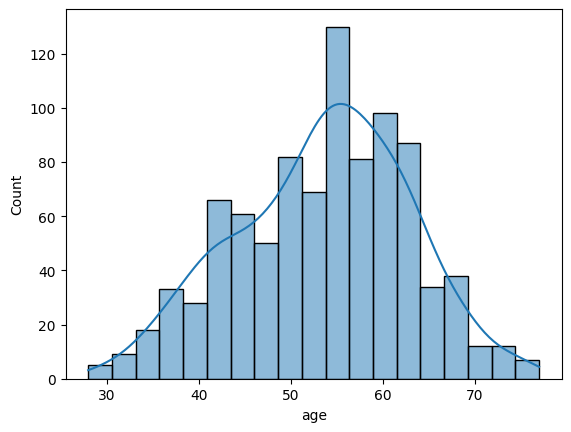

In [11]:
# here is to draw the histogram of the age colunmn to check the distribution
sns.histplot(data=df,x='age',kde=True)

The mean is : 53.51086956521739
The median is : 54.0
The mode is : 54


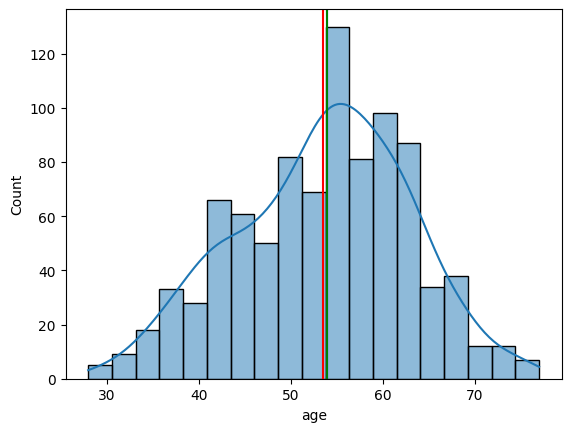

In [12]:
# here is to plot the mean median and mode of the column using the sns
sns.histplot(data=df,x='age',kde= True)
plt.axvline(df['age'].mean(),color = 'red')
plt.axvline(df['age'].median(),color = 'blue')
plt.axvline(df['age'].mode()[0],color = 'green')
# here is also to print the mean median and mode of the age column
print('The mean is :',df['age'].mean())
print('The median is :',df['age'].median())
print('The mode is :',df['age'].mode()[0])

In [13]:
# here is to look at sex column and draw a histogram on the sex column using plotly
fig = px.histogram(data_frame=df,x='age',color='sex')
fig.show()

In [14]:
# here is to see the value count in the sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [15]:
# here is to find the parcentage of male and female in the data
mal_count = 726
femal_count = 194
total_count = mal_count+femal_count
# no to count the %
mal_par = (mal_count/total_count) * 100
femal_par = (femal_count/total_count)* 100

# noe to print the %
print(f'The male parcentage in the data is :{mal_par:2f}%')
print(f'The femal parcentage in the data is :{femal_par:2f}%')

The male parcentage in the data is :78.913043%
The femal parcentage in the data is :21.086957%


In [16]:
# here is to find the value counts by groupby functio by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [17]:
# lets have look on the dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [18]:
# checking the value counts in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [19]:
# here we understand that the data from the 4 different placse is from Cleveland is 304 , Hungary is 293,VA Long Beach is 200,Switzerland is 123
# now we make the difference between the male and femle in the data set column
# here we will use the count plot to make a plot of it
# sns.countplot(df,x='dataset',hue='sex')
# lets do it by using the plotlt
fig = px.bar(data_frame=df,x='dataset',color='sex')
fig.show()

In [20]:
# here is to find out the number of male and female in the dataset column by groupby
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [21]:
# make a plot of age column by coloring them  by dataset column using plotly
fig = px.histogram(data_frame=df,x='age',color='dataset')
fig.show()
# Calculating mean, median, and mode
print(f"The Mean of the Data set is : {df.groupby('dataset')['age'].mean()}")
print('----------------------------------------------------------------------------------')
print(f"The Median of the Data set is : {df.groupby('dataset')['age'].median()}")
print('----------------------------------------------------------------------------------')
print(f"The Mode of the Data set is : {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print('----------------------------------------------------------------------------------')

The Mean of the Data set is : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------------------------------------------------------
The Median of the Data set is : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------------------------------------------------------
The Mode of the Data set is : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------------------------------------------------------


In [22]:
# here is to lool at the cp column (chest pain)
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

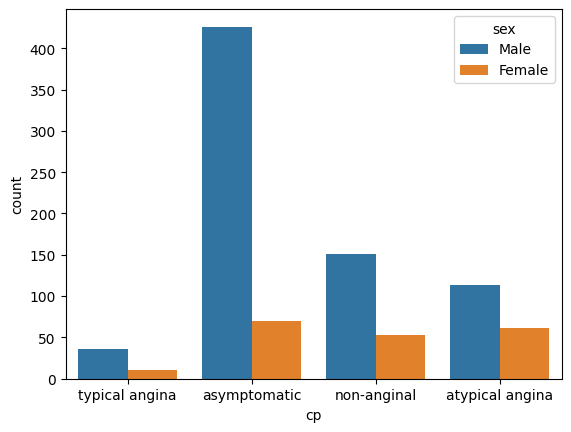

In [23]:
# here is to draw a count plot of cp column base on the age column
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

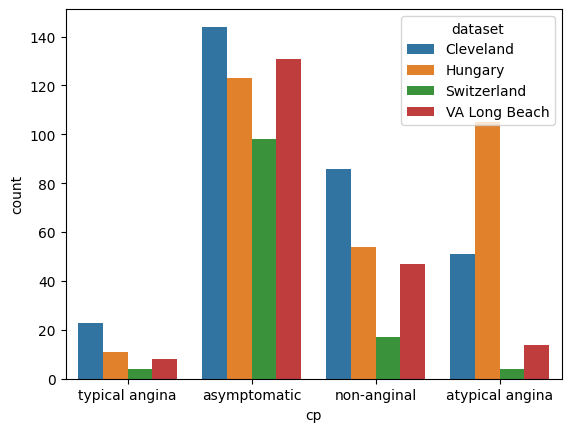

In [24]:
# here is to plot the same plot based on the dataset column to check where are the most people
sns.countplot(df,x='cp',hue='dataset')

In [25]:
# lets have look into the tresbpb column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

#### The Normal resting Blood Pressure is : 120/80

<Axes: xlabel='trestbps', ylabel='Count'>

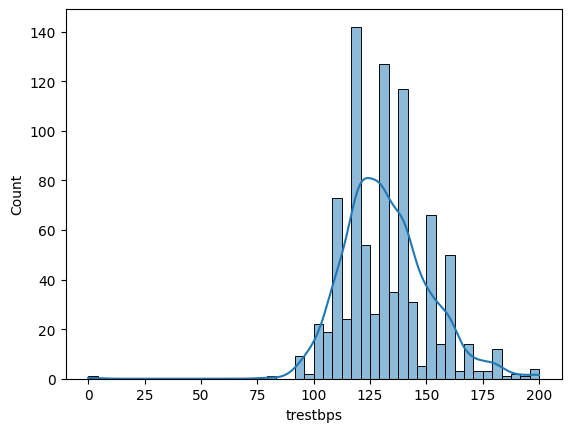

In [26]:
# create the hisplot of the trestbps column
sns.histplot(df,x='trestbps',kde=True)

In [27]:
# here we know that there is soe missing values in the column now to check them
print('the parcentage of the missing values in the trestbps coulumn is ',df['trestbps'].isnull().sum() / len(df) * 100)

the parcentage of the missing values in the trestbps coulumn is  6.41304347826087


In [28]:
# now we have to impute the missing values using the itrative imputer 
imputer = IterativeImputer(max_iter=10,random_state=42)
# fitting the imputer on the trestbps column
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

In [29]:
# here we know that there is soe missing values in the column now to check them
print('the parcentage of the missing values in the trestbps coulumn is ',df['trestbps'].isnull().sum() / len(df) * 100)

the parcentage of the missing values in the trestbps coulumn is  0.0


#### Here there are missing values in some column of the dataset lets have look into that

In [30]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
num           0
dtype: int64

In [31]:
# here is to look at the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [32]:
# here first we will impute the missing values of the columns which have the float category
# so the columns which have the missing value and thier category is float
# chol, thalch,oldpeak,ca, so these four column have the missing vales and thier dype is float no to impute them
imputer_2 = IterativeImputer(max_iter=10,random_state=42)
# now fitting the imputer on the columns to impute the missing vlues
df[['chol','thalch','oldpeak','ca']] = imputer_2.fit_transform(df[['chol','thalch','oldpeak','ca']])

In [33]:
# now lets check the missing values of these four columns]
df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
thalch        0
oldpeak       0
ca            0
num           0
dtype: int64

#### here the missing values of the columns which have the dtype is float is imputed.

### Lets have look on to the thal column

In [34]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [35]:
# checking the missing values parcentage 
df['thal'].isnull().sum() / len(df) * 100

52.826086956521735

------------------
# Dealing With The Missing Values

we Will Create a Function For Dealing with Missing Values.

In [36]:
# here is to store the column with missing values in to an object
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
# here the above code will store all those columns which have greater values the 0 missing values
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [37]:
# here is to sepater the columns based on thier datatypes
categorical_cols = ['thal','ca','slope','exang','restecg','fbs','cp','sex','num']
bool_cols = ['fbs','exang']
numraical_cols = ['oldpeak','thalch','chol','trestbps','age']

In [38]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]           

In [39]:
# here is to check the missing values agin
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [40]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numraical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.85 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [41]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


-----------
# **Dealing with Outliers**

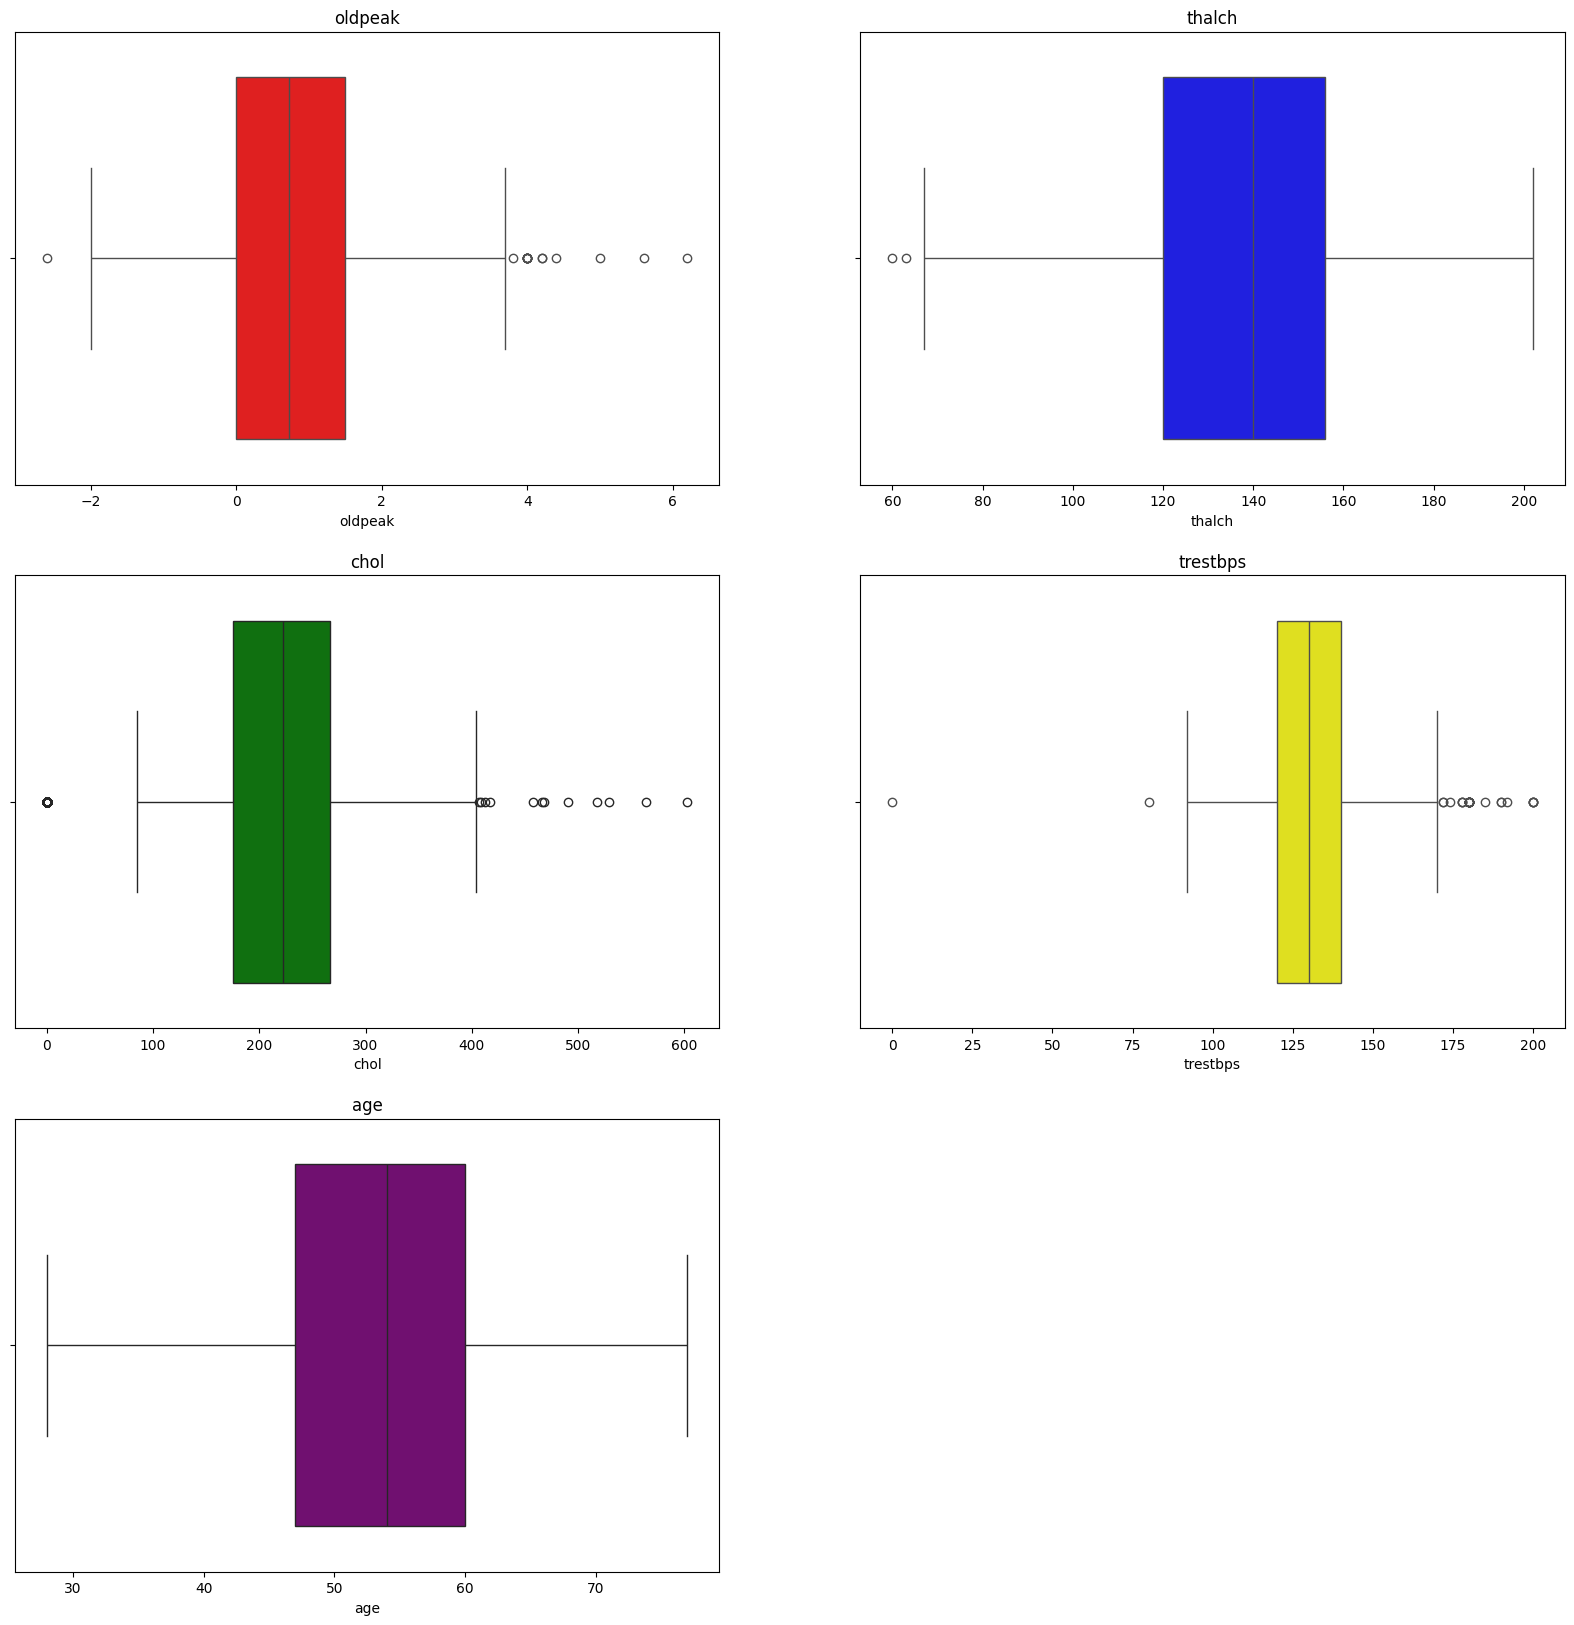

In [42]:
# here to plot all the numarical columns
plt.figure(figsize=(20,20))
colors = ['red','blue','green','yellow','purple']
for i,col in enumerate(numraical_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
    
plt.show()

In [43]:
# here is to make the same plot using plotly for the numarical columns
fig = px.box(data_frame=df,y='age')
fig.show()
fig1 = px.box(data_frame=df,y='trestbps')
fig1.show()
fig2 = px.box(data_frame=df,y='chol')
fig2.show()
fig3 = px.box(data_frame=df,y='thalch')
fig3.show()
fig4 = px.box(data_frame=df,y='oldpeak')
fig4.show()



In [44]:
# here is to print the row where the trestbps is 0 form the df
df[df['trestbps']==0]
# now we need to remove this from the data becase its an outlier
df = df[df['trestbps'] !=0 ]

In [45]:
# now to check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [46]:
# here is to check the outlier in the trestbps column either its removed or not
fig = px.box(data_frame=df,y='age')
fig.show()
fig1 = px.box(data_frame=df,y='trestbps')
fig1.show()
fig2 = px.box(data_frame=df,y='chol')
fig2.show()
fig3 = px.box(data_frame=df,y='thalch')
fig3.show()
fig4 = px.box(data_frame=df,y='oldpeak')
fig4.show()



#### here u can see that the outlier is removed and the trestbps is now start from 80 which is normal

In [47]:
# now to check the outlier in the chol column is it possiable that some one have the cholestrol level of 0
# let have a lool
df[df['chol']==0]
# here is 171 row where the chol is 0 so it mean its not an outlier

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.585346,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.283606,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.757452,flat,0.566071,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.640861,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.505422,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.622004,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.583685,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.773462,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,126.212428,True,0.785303,flat,0.603066,reversable defect,1


# _**Appling Machine Learning Algorithems**_

In [48]:
# here first we look at the num column
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is the predictes attributes.we will use this column to predict the heart disease.
The unique values in this column are [0,1,2,3,4] which states that\
* `0 = means no heart disease\`
* `1 = means mild level heart disease\`
* `2 = means moderate level heart disease\`
* `3 = means sever heart disease\`
* `4 = means critical heart disease`

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [57]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


### Enlist all the models that you will use to predict the heart disease.these model shuld be classifiers and multi class classifiers.
1. Logistic Regression
2. KNN
3. SVM
4. NB
5. Decision tree
6. Random Forest
7. XGboost
8. Lightgbm
9. Adaboost
10. Gredientboost

In [53]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model) 
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model.named_steps['model'])

# Save the best model
with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

Model: Random Forest
Cross-validation Accuracy: 0.6345566860465116
Test Accuracy: 0.6557971014492754

Model: Gradient Boosting
Cross-validation Accuracy: 0.6204699612403101
Test Accuracy: 0.6521739130434783

Model: Support Vector Machine
Cross-validation Accuracy: 0.5754602713178294
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5224806201550388
Test Accuracy: 0.5072463768115942

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5738977713178295
Test Accuracy: 0.5978260869565217

Model: Decision Tree
Cross-validation Accuracy: 0.570796996124031
Test Accuracy: 0.5905797101449275

Model: Ada Boost
Cross-validation Accuracy: 0.5847020348837209
Test Accuracy: 0.5760869565217391

Model: XG Boost
Cross-validation Accuracy: 0.617405523255814
Test Accuracy: 0.6557971014492754

Model: Naive Bayes
Cross-validation Accuracy: 0.5770348837209303
Test Accuracy: 0.5615942028985508

Best Model: RandomForestClassifier(random_state=42)
